# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('sinasc_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [22]:
df['APGAR5'] = pd.to_numeric(df['APGAR5'], errors='coerce')

def categoriza_apgar5(valor):
    if pd.isna(valor):
        return 'desconhecido'
    elif 0 <= valor <= 3:
        return 'asfixia grave'
    elif 4 <= valor <= 5:
        return 'asfixia moderada'
    elif 6 <= valor <= 7:
        return 'asfixia leve'
    elif 8 <= valor <= 10:
        return 'normal'
    else:
        return 'valor inválido'

df['APGAR5_CAT'] = df['APGAR5'].apply(categoriza_apgar5)

print(df['APGAR5_CAT'].value_counts())

APGAR5_CAT
normal              26463
asfixia leve          320
desconhecido          103
asfixia grave          74
asfixia moderada       68
Name: count, dtype: int64


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [23]:
print(df['GESTACAO'].unique())
print(df['GESTACAO'].value_counts())


['37 a 41 semanas' '42 semanas e mais' '32 a 36 semanas' '22 a 27 semanas'
 '28 a 31 semanas' nan 'Menos de 22 semanas']
GESTACAO
37 a 41 semanas        22589
32 a 36 semanas         2249
42 semanas e mais        700
28 a 31 semanas          165
22 a 27 semanas           86
Menos de 22 semanas        7
Name: count, dtype: int64


C:\Users\shinoki\AppData\Local\Temp\ipykernel_16548\3381002580.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


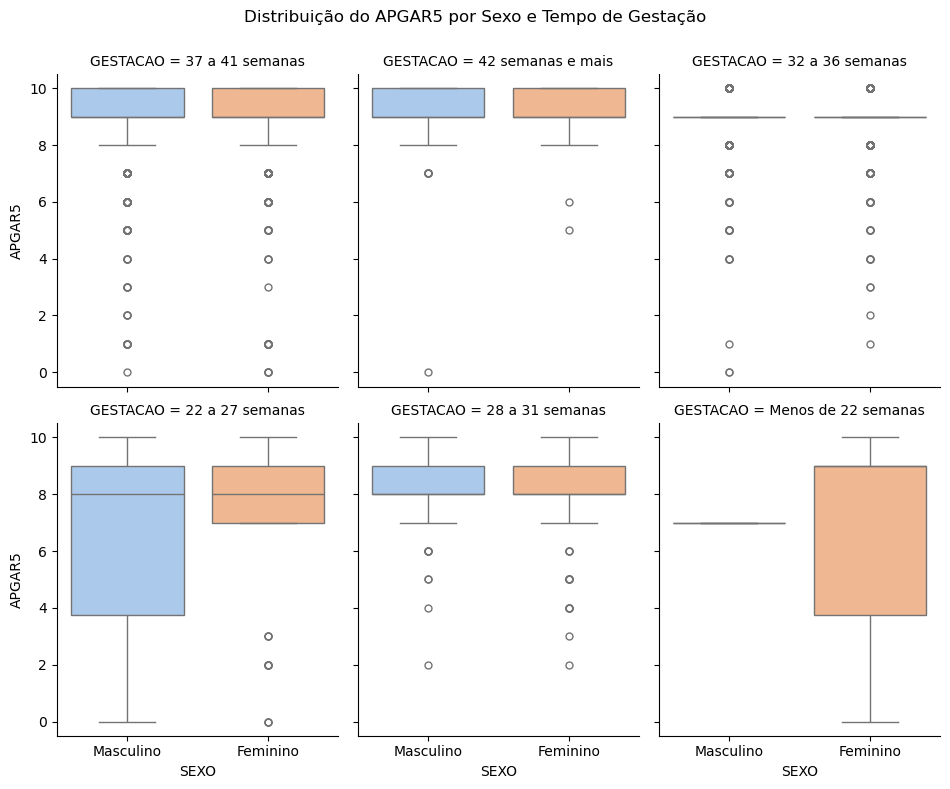

In [24]:
df_filtrado = df[df['APGAR5'].notna() & df['SEXO'].notna() & df['GESTACAO'].notna()]

g = sns.catplot(
    data=df_filtrado,
    x='SEXO',
    y='APGAR5',
    col='GESTACAO',
    kind='box',
    col_wrap=3,
    height=4,
    aspect=0.8,
    palette='pastel'
)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribuição do APGAR5 por Sexo e Tempo de Gestação')
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [25]:
df_validos = df[df['APGAR5'].notna() & df['GESTACAO'].notna()]

tabela_cruzada = pd.crosstab(df_validos['GESTACAO'], df_validos['APGAR5'])

print(tabela_cruzada)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [27]:
tabela_percentual = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

print(tabela_percentual.round(2))


APGAR5                0.0   1.0    2.0   3.0   4.0   5.0   6.0    7.0    8.0   \
GESTACAO                                                                        
22 a 27 semanas       8.24  0.00   9.41  7.06  1.18  0.00  2.35  11.76  28.24   
28 a 31 semanas       0.00  0.00   1.23  0.62  3.09  4.32  4.32   6.79  37.65   
32 a 36 semanas       0.09  0.09   0.09  0.09  0.36  0.49  0.76   2.51  16.20   
37 a 41 semanas       0.02  0.09   0.01  0.02  0.03  0.09  0.20   0.67   6.29   
42 semanas e mais     0.14  0.00   0.00  0.00  0.00  0.14  0.14   0.72   6.30   
Menos de 22 semanas  14.29  0.00  14.29  0.00  0.00  0.00  0.00  14.29   0.00   

APGAR5                9.0    10.0  
GESTACAO                           
22 a 27 semanas      22.35   9.41  
28 a 31 semanas      33.95   8.02  
32 a 36 semanas      58.50  20.81  
37 a 41 semanas      60.23  32.34  
42 semanas e mais    60.60  31.95  
Menos de 22 semanas  42.86  14.29  


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

C:\Users\shinoki\AppData\Local\Temp\ipykernel_16548\2782013653.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_validos['Grupo_Gestacao'] = df_validos['GESTACAO'].apply(classificar_prematuro)


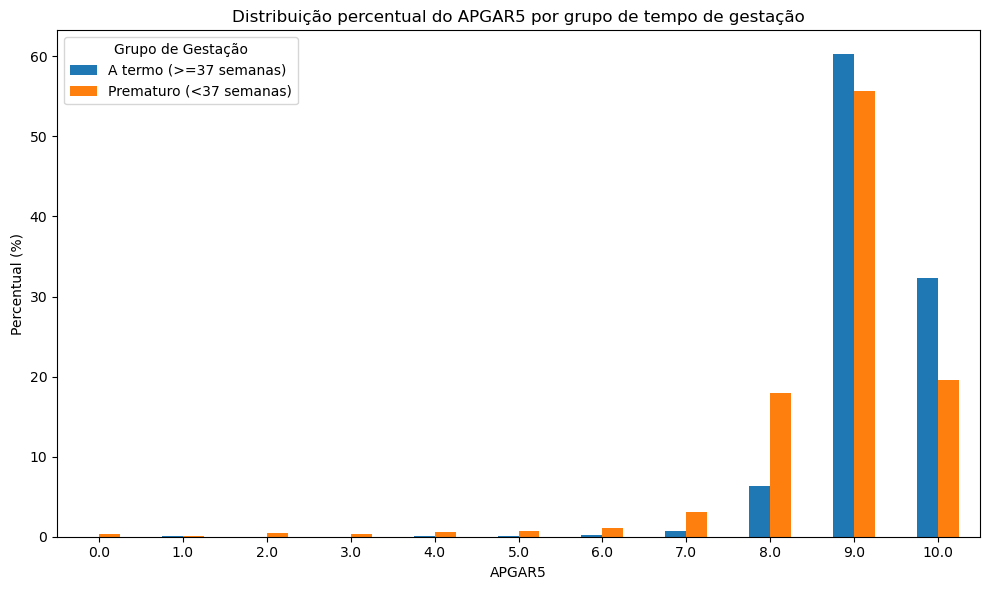

In [28]:
df_validos = df[df['APGAR5'].notna() & df['GESTACAO'].notna()]

def classificar_prematuro(gestacao):
    prematuros = ['Menos de 22 semanas', '22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas']
    a_termo = ['37 a 41 semanas', '42 semanas e mais']
    if gestacao in prematuros:
        return 'Prematuro (<37 semanas)'
    elif gestacao in a_termo:
        return 'A termo (>=37 semanas)'
    else:
        return None

df_validos['Grupo_Gestacao'] = df_validos['GESTACAO'].apply(classificar_prematuro)

df_validos = df_validos[df_validos['Grupo_Gestacao'].notna()]

tabela_cruzada = pd.crosstab(df_validos['Grupo_Gestacao'], df_validos['APGAR5'])

tabela_percentual = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

tabela_percentual.T.plot(kind='bar', figsize=(10,6))
plt.title('Distribuição percentual do APGAR5 por grupo de tempo de gestação')
plt.ylabel('Percentual (%)')
plt.xlabel('APGAR5')
plt.xticks(rotation=0)
plt.legend(title='Grupo de Gestação')
plt.tight_layout()
plt.show()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

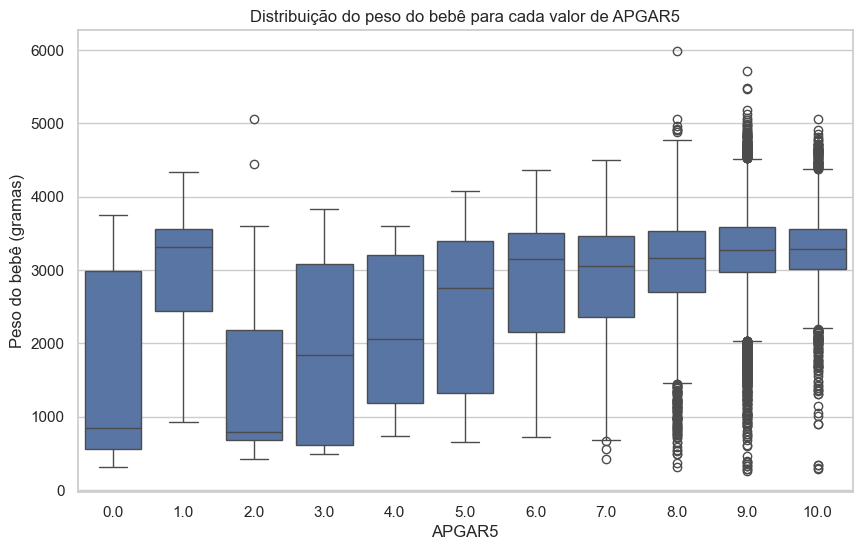

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='APGAR5', y='PESO', data=df)
plt.title('Distribuição do peso do bebê para cada valor de APGAR5')
plt.xlabel('APGAR5')
plt.ylabel('Peso do bebê (gramas)')
plt.show()


C:\Users\shinoki\AppData\Local\Temp\ipykernel_16548\2085078297.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='APGAR5', y='PESO', data=df, ci=None)


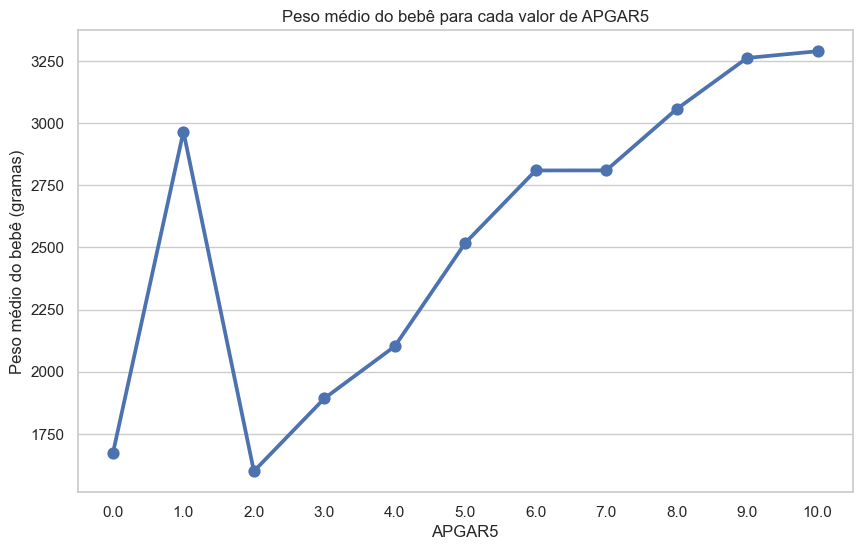

In [31]:
plt.figure(figsize=(10,6))
sns.pointplot(x='APGAR5', y='PESO', data=df, ci=None)
plt.title('Peso médio do bebê para cada valor de APGAR5')
plt.xlabel('APGAR5')
plt.ylabel('Peso médio do bebê (gramas)')
plt.show()


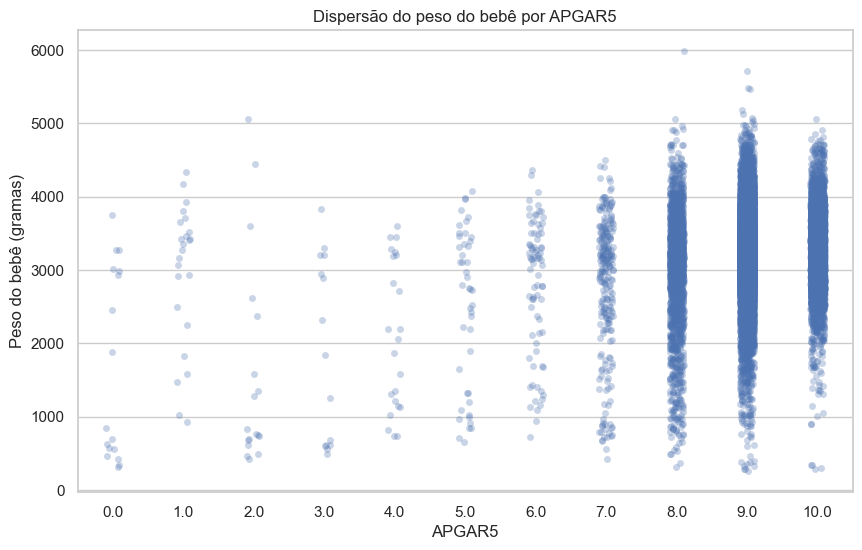

In [32]:
plt.figure(figsize=(10,6))
sns.stripplot(x='APGAR5', y='PESO', data=df, jitter=True, alpha=0.3)
plt.title('Dispersão do peso do bebê por APGAR5')
plt.xlabel('APGAR5')
plt.ylabel('Peso do bebê (gramas)')
plt.show()


In [33]:
df_corr = df[['APGAR5', 'PESO']].dropna()
correlacao = df_corr['APGAR5'].corr(df_corr['PESO'])
print(f'Correlação de Pearson entre APGAR5 e Peso: {correlacao:.3f}')


Correlação de Pearson entre APGAR5 e Peso: 0.168
